# Filled Julia set
___
Let $C\in \mathbb{C}$ is fixed. A *Filled Julia set* $K_C$ is the set of $z\in \mathbb{C}$ which satisfy $\ f^n_C(z)$ $(n \ge 1)$is bounded :
$$K_C = \bigl\{ z\in \mathbb{C}\bigm|\{f^n_C(z)\}_{n\ge 1} : bounded\bigr\},$$
where $\ \ f^1_C(z) =  f_C(z) = z^2 + C $, $\ \ f^n_C = f^{n-1}_C \circ f_C$.   
For more details, see [Wikipedia--Filled Julia set](https://en.wikipedia.org/wiki/Filled_Julia_set).
___

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def filledjulia(x_min, x_max, y_min, y_max, C, N, x_pix, y_pix, R):
    '''
    calculate where of z is in the Filled Julia set
    '''
    x = np.linspace(x_min, x_max, x_pix).astype(np.float32) 
    y = np.linspace(y_max, y_min, y_pix).reshape(y_pix, 1).astype(np.float32) * 1j
                                               # below of y-axis is smaller
    z = x + y   #broadcasting by numpy
    counter = np.zeros_like(z, dtype=np.uint32)
    boolean = np.less(abs(z), R)
    for i in range(N):
        z[boolean] = z[boolean]**2 + C
        boolean = np.less(abs(z), R)
        if not boolean.any():
            break    # finish if all the elements of boolean are False
        counter[boolean] += 1
    return counter


def draw_fj(x_min, x_max, y_min, y_max, C, N, 
            x_pix=1000, y_pix=1000, R=5, colormap='viridis'):
    '''
    draw a Filled Julia set
    '''
    counter = filledjulia(x_min, x_max, y_min, y_max, C, N, x_pix, y_pix, R)
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks(np.linspace(x_min, x_max, 5))
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.set_title("Filled Julia Set: C = {}".format(C))
    plt.imshow(counter, extent=[x_min, x_max, y_min, y_max], cmap=colormap)

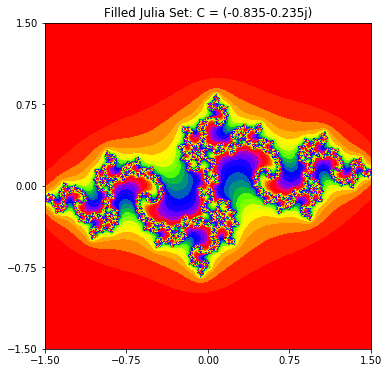

In [2]:
x_min = -1.5
x_max =  1.5
y_min = -1.5
y_max =  1.5
C = -0.835 - 0.235j
N = 200
colormap = 'prism'

draw_fj(x_min, x_max, y_min, y_max, C, N, colormap=colormap)
plt.savefig("./pictures/filled_julia{}.png".format(C), dpi=72)

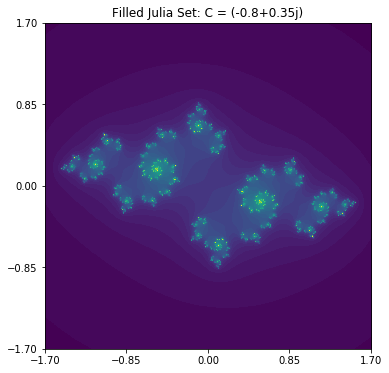

In [3]:
x_min = -1.7
x_max =  1.7
y_min = -1.7
y_max =  1.7
C = -0.8 + 0.35j
N = 50

draw_fj(x_min, x_max, y_min, y_max, C, N)
plt.savefig("./pictures/filled_julia{}.png".format(C), dpi=72)

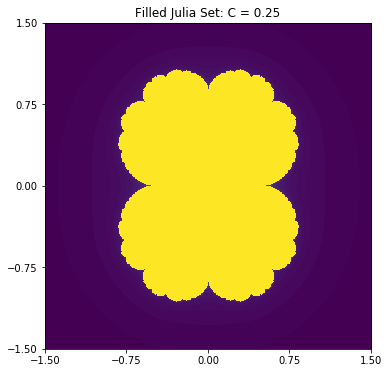

In [4]:
x_min = -1.5
x_max =  1.5
y_min = -1.5
y_max =  1.5
C = 0.25
N = 100

draw_fj(x_min, x_max, y_min, y_max, C, N)
plt.savefig("./pictures/filled_julia{}.png".format(C), dpi=72)

The complement of a Filled Julia set is called a *Fatou set*.

# Julia set
___
A *Julia set* $J_C$ is the **boundary** of a Filled Julia set:
$$J_C = \partial K_C.$$  
For more details, see [Wikipedia--Julia set](https://en.wikipedia.org/wiki/Julia_set).
___

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def find_1_boundary(pix, boolean):
    '''   
    for each row,
    if five or more "True" are arranged continuously, 
    rewrite it to "False" except two at each end.
    '''
    boolean = np.copy(boolean)
    for i in range(pix):
        if not boolean[i].any():
            continue
        coord = np.where(boolean[i])[0]
        if len(coord) <= 5:
            continue
        for k in range(len(coord)-5):
            if coord[k+5]-coord[k] == 5:  
                boolean[i, coord[k+3]] = False
    return boolean        
            
               
def findboundary(x_pix, y_pix, boolean):
    '''
    for each row and column, execute the function of 'find_1_boundary'.
    '''
    boundary_x = find_1_boundary(y_pix, boolean)
    boundary_y = find_1_boundary(x_pix, boolean.transpose()).transpose()
    boundary = boundary_x | boundary_y
    return boundary     

In [6]:
def julia(x_min, x_max, y_min, y_max, C, N, N_b, x_pix, y_pix, R):
    '''
    calculate where of z is a Julia set
    if n >= N_b, find the boundary of the set.
    '''
    x = np.linspace(x_min, x_max, x_pix).astype(np.float32) 
    y = np.linspace(y_max, y_min, y_pix).reshape(y_pix, 1).astype(np.float32) * 1j
    z = x + y
    boundary = np.zeros_like(z, dtype=bool)
    boolean = np.less(abs(z), R)
    for i in range(N):
        z[boolean] = z[boolean]**2 + C
        boolean = np.less(abs(z), R)
        if boolean.any() == False:
            break
        elif i >= N_b-1: # remember i starts 0
            boundary = boundary | findboundary(x_pix, y_pix, boolean)
    return boundary
        

def draw_j(x_min, x_max, y_min, y_max, C, N, N_b, 
                x_pix=1000, y_pix=1000, R=5, colormap='binary'):
    '''
    draw a Julia set
    '''
    boundary = julia(x_min, x_max, y_min, y_max, C, N, N_b, x_pix, y_pix, R)
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks(np.linspace(x_min, x_max, 5))
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.set_title("Julia set: C = {}".format(C))    
    plt.imshow(boundary, extent=[x_min, x_max, y_min, y_max], cmap='binary')

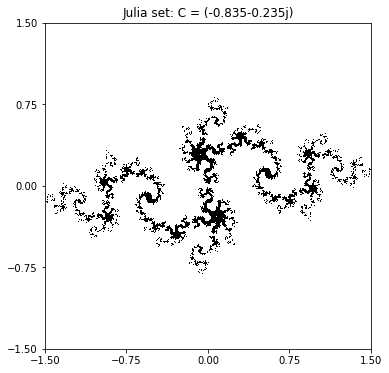

In [7]:
x_min = -1.5
x_max =  1.5
y_min = -1.5
y_max =  1.5
C = -0.835 - 0.235j
N = 200
N_b = 30

draw_j(x_min, x_max, y_min, y_max, C, N, N_b)
plt.savefig("./pictures/julia{}.png".format(C), dpi=72)

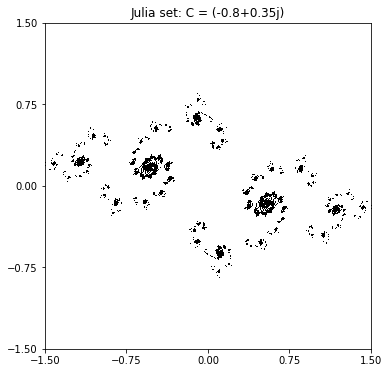

In [8]:
x_min = -1.5
x_max =  1.5
y_min = -1.5
y_max =  1.5
C = -0.8 + 0.35j
N = 50
N_b = 20

draw_j(x_min, x_max, y_min, y_max, C, N, N_b)
plt.savefig("./pictures/julia{}.png".format(C), dpi=72)

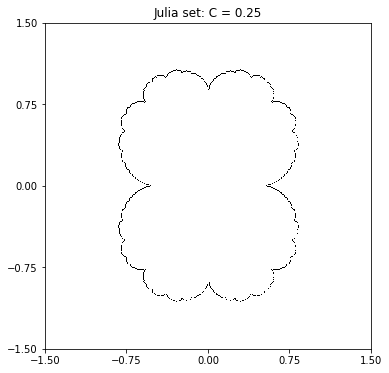

In [9]:
x_min = -1.5
x_max =  1.5
y_min = -1.5
y_max =  1.5
C = 0.25
N = 30
N_b = 30

draw_j(x_min, x_max, y_min, y_max, C, N, N_b)
plt.savefig("./pictures/julia{}.png".format(C), dpi=72)